# UNIVARIATE ANALYSIS

## CATEGORICAL COLUMNS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

date_cols = [
    'reservation_created_at',
    'trip_month',
    'trip_week',
    'trip_day',
    'trip_period',
    'client_first_reservation',
    'client_prev_reservation',
    'client_next_reservation',
    'client_last_reservation',
    'client_first_trip',
    'client_prev_trip',
    'client_next_trip',
    'client_last_trip'
]

col_types = {'reservation_id':'int'}


original_df = pd.read_csv('data.csv', parse_dates=date_cols)
df = original_df.copy()

In [4]:
df.select_dtypes(include='object').describe()

,source,reservation_confirmed,reservation_finished,successfully_charged,reservation_active,trip_itinerary,route_name,line_name,client_first_route,client_prev_route,client_next_route,client_last_route
count,3533,3533,3533,3533,3533,3903,3903,3903,3903,2822,2677,3903
unique,2,2,1,1,1,77,16,7,18,16,19,16
top,App,True,False,True,True,16:00:00,Querétaro - CDMX,Querétaro - CDMX,Querétaro - CDMX,Querétaro - CDMX,Querétaro - CDMX,Querétaro - CDMX
freq,3524,3237,3533,3533,3533,206,1408,2691,1970,1046,930,1409


### source

In [30]:
df.source.value_counts() # web is not being used

App    3524
Web       9
Name: source, dtype: int64

### reservation_confirmed

In [6]:
df.reservation_confirmed.value_counts()

True     3237
False     296
Name: reservation_confirmed, dtype: int64

### route_name	

In [22]:
df.route_name.value_counts()

Querétaro - CDMX                  1408
CDMX - Querétaro                  1283
CDMX - Tepoztlán - Cuernavaca      416
Cuernavaca - Tepoztlán - CDMX      375
Querétaro - Guadalajara vieja       94
Guadalajara - Querétaro vieja       85
CDMX - Pachuca                      40
Pachuca - CDMX                      40
Veracruz - Cdmx                     35
Cdmx - Veracruz                     30
Querétaro - Morelia                 26
Morelia - Querétaro                 25
CDMX - Acapulco                     19
Acapulco - CDMX                     13
Guadalajara - Querétaro              7
Querétaro - Guadalajara              7
Name: route_name, dtype: int64

### line_name

In [23]:
df.line_name.value_counts() # 'Querétaro - Guadalajara' incluye las rutas nueva y vieja

Querétaro - CDMX           2691
Cuernavaca - CDMX           791
Querétaro - Guadalajara     193
Pachuca - CDMX               80
Veracruz - Cdmx              65
Querétaro - Morelia          51
Acapulco - CDMX              32
Name: line_name, dtype: int64

In [61]:
df.line_name.value_counts(normalize=True)

Querétaro - CDMX           0.689470
Cuernavaca - CDMX          0.202665
Querétaro - Guadalajara    0.049449
Pachuca - CDMX             0.020497
Veracruz - Cdmx            0.016654
Querétaro - Morelia        0.013067
Acapulco - CDMX            0.008199
Name: line_name, dtype: float64

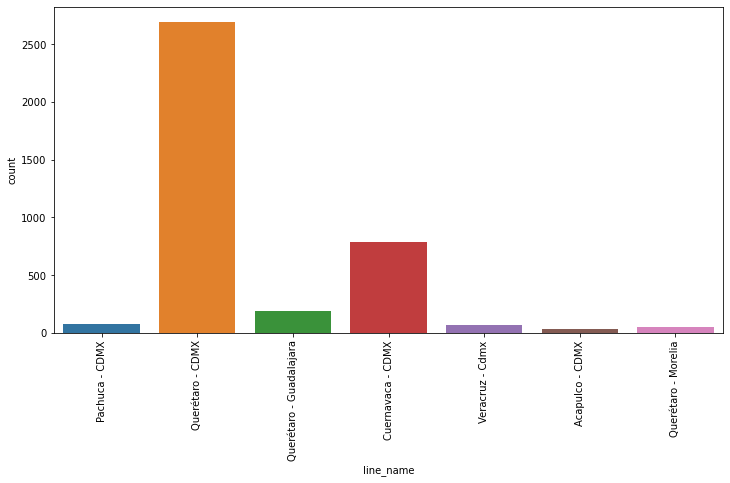

In [60]:
fig, ax = plt.subplots(figsize = (12,6))

g = sns.countplot(data=df, x='line_name')
fig = g.get_figure()
plt.xticks(rotation=90)

fig.savefig('img/lines.png') 

None

### client_first_route

In [24]:
df.client_first_route.value_counts()

Querétaro - CDMX                  1970
CDMX - Querétaro                  1078
CDMX - Tepoztlán - Cuernavaca      414
Cuernavaca - Tepoztlán - CDMX      263
Querétaro - Guadalajara vieja       38
Guadalajara - Querétaro vieja       23
Cdmx - Veracruz                     20
CDMX - Acapulco                     17
CDMX - Pachuca                      15
Pachuca - CDMX                      14
Veracruz - Cdmx                     12
CDMX - Cuernavaca                   12
Acapulco - CDMX                      7
Querétaro - Morelia                  7
Morelia - Querétaro                  5
Querétaro - Guadalajara              4
Cuernavaca - CDMX                    2
Guadalajara - Querétaro              2
Name: client_first_route, dtype: int64

### client_prev_route

In [26]:
df.client_prev_route.value_counts()

Querétaro - CDMX                  1046
CDMX - Querétaro                   944
CDMX - Tepoztlán - Cuernavaca      304
Cuernavaca - Tepoztlán - CDMX      238
Querétaro - Guadalajara vieja       74
Guadalajara - Querétaro vieja       72
CDMX - Pachuca                      28
Pachuca - CDMX                      28
Querétaro - Morelia                 22
Cdmx - Veracruz                     21
Morelia - Querétaro                 18
Veracruz - Cdmx                     15
Acapulco - CDMX                      5
Guadalajara - Querétaro              4
Querétaro - Guadalajara              2
CDMX - Acapulco                      1
Name: client_prev_route, dtype: int64

### client_next_route

In [27]:
df.client_next_route.value_counts()

Querétaro - CDMX                  930
CDMX - Querétaro                  909
Cuernavaca - Tepoztlán - CDMX     283
CDMX - Tepoztlán - Cuernavaca     245
Guadalajara - Querétaro vieja      69
Querétaro - Guadalajara vieja      64
Pachuca - CDMX                     29
CDMX - Pachuca                     28
Veracruz - Cdmx                    25
Querétaro - Morelia                25
Morelia - Querétaro                22
Cdmx - Veracruz                    16
Acapulco - CDMX                     9
Guadalajara - Querétaro             7
Querétaro - Guadalajara             6
CDMX - Tequisquiapan                5
CDMX - Acapulco                     3
León - Querétaro                    1
Puebla - CDMX                       1
Name: client_next_route, dtype: int64

### client_last_route

In [28]:
df.client_next_route.value_counts()

Querétaro - CDMX                  930
CDMX - Querétaro                  909
Cuernavaca - Tepoztlán - CDMX     283
CDMX - Tepoztlán - Cuernavaca     245
Guadalajara - Querétaro vieja      69
Querétaro - Guadalajara vieja      64
Pachuca - CDMX                     29
CDMX - Pachuca                     28
Veracruz - Cdmx                    25
Querétaro - Morelia                25
Morelia - Querétaro                22
Cdmx - Veracruz                    16
Acapulco - CDMX                     9
Guadalajara - Querétaro             7
Querétaro - Guadalajara             6
CDMX - Tequisquiapan                5
CDMX - Acapulco                     3
León - Querétaro                    1
Puebla - CDMX                       1
Name: client_next_route, dtype: int64

# CONLUSIONS:

1. Web is not being used (only 9 registers from 3.5k)
1. The route QRO-CDMX is by far our best route. Efforts should be conducted towards this route or similar.